In [1]:
import cirq
print("Imported cirq")

Imported cirq


In [4]:
qubit = cirq.GridQubit(0,0)

#Create a circuit
circuit = cirq.Circuit(
    cirq.X(qubit)**0.5, #square root of NOT.
    cirq.measure(qubit, key='m') # Measurement
)
print("Circuit:")
print(circuit)


# simulate the circuit several times:
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=20)
print("Results:")
print(result)

Circuit:
(0, 0): ───X^0.5───M('m')───
Results:
m=10000101000000110100


In [2]:
import cirq_google
print("Imported cirq_google")

/usr/lib/python3.10/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: git-archive.dev8b63d73a17 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/e46le/.local/lib/python3.10/site-packages/cirq/ops/gateset.py:376: UserWarning: v0.14.1 is the last release `cirq.GlobalPhaseGate` is included by default. If you were relying on this behavior, you can include a `cirq.GlobalPhaseGate` in your `*gates`. If not, then you can ignore this warning. It will be removed in v0.16
  warnings.warn(


Imported cirq_google


In [6]:
# Using named qubits can be useful for abstract algorithms
# as well as algorithms not yet mapped onto hardware.
q0 = cirq.NamedQubit('source')
q1 = cirq.NamedQubit('target')

# Line qubits can be created individually
q3 = cirq.LineQubit(3)

# or created in a range
# this will create LineQubit(0), LineQubit(1), LineQubit(2)

q0, q1, q2 = cirq.LineQubit.range(3)

# Grid qubits can also be referenced individually 
q4_5 = cirq.GridQubit(4, 5)

# or created in bulk in a square
# this will create 16 qubits from (0,0) to (3,3)
qubits = cirq.GridQubit.square(4)

In [7]:
print(cirq_google.Sycamore)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

In [5]:
# Example gates
cnot_gate = cirq.CNOT
pauli_z = cirq.Z

# Use Exponentiation to get square root gates
sqrt_x_gate = cirq.X**0.5

# Some gates can also take parameters
sqrt_sqrt_y = cirq.YPowGate(exponent=0.25)

# Create two qubits at once, in a line.
q0, q1 = cirq.LineQubit.range(2)

# Example Operations
z_op = cirq.Z(q0)
not_op = cirq.CNOT(q0, q1)
sqrt_iswap_op = cirq.SQRT_ISWAP(q0, q1)

# You can also use the gates you specified earlier.
cnot_op = cnot_gate(q0, q1)
pauli_z_op = pauli_z(q0)
sqrt_x_op = pauli_z(q0)
sqrt_sqrt_y_op = sqrt_sqrt_y(q0)

circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(3)
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.H(qubits[1]))
circuit.append(cirq.H(qubits[2]))
print(circuit)

0: ───H───

1: ───H───

2: ───H───


In [6]:
circuit = cirq.Circuit()
ops = [cirq.H(q) for q in cirq.LineQubit.range(3)]
circuit.append(ops)
print(circuit)

0: ───H───

1: ───H───

2: ───H───


In [9]:
# Append with generator
circuit  = cirq.Circuit()
circuit.append(cirq.H(q) for q in cirq.LineQubit.range(3))
print(circuit)
# Inittializer with generator
print(cirq.Circuit(cirq.H(q) for q in cirq.LineQubit.range(3)))

0: ───H───

1: ───H───

2: ───H───
0: ───H───

1: ───H───

2: ───H───


In [10]:
print(cirq.Circuit(cirq.SWAP(q, q + 1) for q in cirq.LineQubit.range(3)))

0: ───×───────────
      │
1: ───×───×───────
          │
2: ───────×───×───
              │
3: ───────────×───


In [11]:
# Creates each gate in a seperate moment by passing an iterable of Moments instead of Operations.
print(cirq.Circuit(cirq.Moment([cirq.H(q)]) for q in cirq.LineQubit.range(3)))

0: ───H───────────

1: ───────H───────

2: ───────────H───


In [13]:
# Create some qubits
q0 = cirq.GridQubit(5, 6)
q1 = cirq.GridQubit(5, 5)
q2 = cirq.GridQubit(4, 5)

# Create operations using the Sycamore gate which is supported by the Sycamore device. 
# However, create operations for both adjacent and non-adjacent qubit pairs.
adjacent_op = cirq_google.SYC(q0, q1)
nonadjacent_op = cirq_google.SYC(q0, q2)

# A working circuit for the Sycamore device raises no issues.
working_circuit = cirq.Circuit()
working_circuit.append(adjacent_op)
valid = cirq_google.Sycamore.validate_circuit(working_circuit)

# A circuit using invalid operations.
bad_circuit = cirq.Circuit()
bad_circuit.append(nonadjacent_op)
try:
    cirq_google.Sycamore.validate_circuit(bad_circuit)
except ValueError as e:
    print(e)

Qubit pair is not valid on device: (cirq.GridQubit(5, 6), cirq.GridQubit(4, 5)).


In [4]:
# Create a circuit to generate a Bell State:
# 1/sqrt(2) * ( |00> + |11> )
bell_circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)
bell_circuit.append(cirq.H(q0))
bell_circuit.append(cirq.CNOT(q0, q1))

# Initialize Simulator
s = cirq.Simulator()

print('Simulate the circuit:')
results = s.simulate(bell_circuit)
print(results)

# for sampling we need to add a measurement at the end
bell_circuit.append(cirq.measure(q0, q1, key='result'))

# Sample the circuit
samples = s.run(bell_circuit, repetitions=1000)

Simulate the circuit:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩


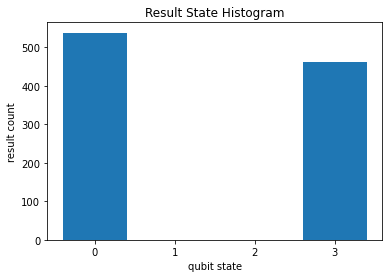

In [5]:
import matplotlib.pyplot as plt

cirq.plot_state_histogram(samples, plt.subplot())
plt.show()

Counter({3: 517, 0: 483})


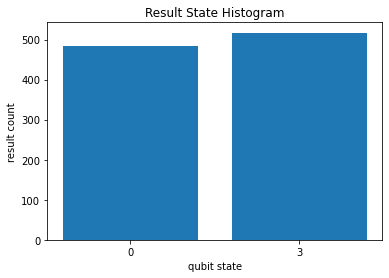

In [6]:
# Pull of histogram counts from the result data structure
counts = samples.histogram(key='result')
print(counts)

# Graph the histogram counts instead of the results
cirq.plot_state_histogram(counts, plt.subplot())
plt.show()

In [6]:
import sympy
print("Imported sympy")

Imported sympy


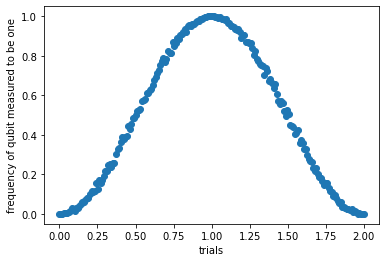

In [12]:
# Perform an X gate with variable exponent
q = cirq.GridQubit(1, 1)
circuit = cirq.Circuit(cirq.X(q) ** sympy.Symbol('t'), cirq.measure(q, key='m'))

# Sweep exponent from zero (off) to one (on) and back to two (off)
param_sweep = cirq.Linspace('t', start=0, stop=2, length=200)

# Sumulate the sweep
s = cirq.Simulator()
trials = s.run_sweep(circuit, param_sweep, repetitions=1000)

# Plot allthe results
x_data = [trial.params['t'] for trial in trials]
y_data = [trial.histogram(key='m')[1] / 1000.0 for trial in trials]
plt.scatter('t', 'p', data={'t': x_data, 'p': y_data})
plt.xlabel("trials")
plt.ylabel("frequency of qubit measured to be one")
plt.show()

In [13]:
print('Unitary of the X gate')
print(cirq.unitary(cirq.X))

print('Unitary of SWAP operator on two qubits.')
q0, q1 = cirq.LineQubit.range(2)
print(cirq.unitary(cirq.SWAP(q0, q1)))

print('Unitary of a sample circuit')
print(cirq.unitary(cirq.Circuit(cirq.X(q0), cirq.SWAP(q0, q1))))

Unitary of the X gate
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
Unitary of SWAP operator on two qubits.
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
Unitary of a sample circuit
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [14]:
print(cirq.decompose(cirq.H(cirq.LineQubit(0))))

[(cirq.Y**0.5).on(cirq.LineQubit(0)), cirq.XPowGate(global_shift=-0.25).on(cirq.LineQubit(0))]


In [16]:
q0, q1, q2 = cirq.LineQubit.range(3)
print(cirq.Circuit(cirq.decompose(cirq.TOFFOLI(q0, q1, q2))))

0: ───T────────────────@─────────────────────────────────@─────────────────────────────@────────────────────────────@───────────────────────────────────────
                       │                                 │                             │                            │
1: ───T───────Y^-0.5───@───Y^0.5────@───T^-1────Y^-0.5───@────────Y^0.5───@───Y^-0.5───@──────Y^0.5────@───Y^-0.5───@──────Y^0.5────@───────────────────────
                                    │                                     │                            │                            │
2: ───Y^0.5───X────────T───Y^-0.5───@───Y^0.5───T────────Y^-0.5───────────@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5───Y^0.5───X───


In [7]:
q = cirq.GridQubit(1, 1)
c = cirq.Circuit(cirq.X(q) ** 0.25, cirq.Y(q) ** 0.25, cirq.Z(q) **  0.25)
print(c)
c = cirq.merge_single_qubit_gates_to_phxz(c)
print(c)


(1, 1): ───X^0.25───Y^0.25───T───
(1, 1): ───PhXZ(a=0.304,x=0.333,z=0.142)───


In [8]:
qubits = cirq.GridQubit.square(3)

print(qubits[0])
print(qubits)

q(0, 0)
[cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(1, 0), cirq.GridQubit(1, 1), cirq.GridQubit(1, 2), cirq.GridQubit(2, 0), cirq.GridQubit(2, 1), cirq.GridQubit(2, 2)]


In [9]:
# this is an Pauli X gate. It is an object instances.
x_gate = cirq.X
# Applying it to the qubit at location (0, 0) (defined above)
# turns it into operation.
x_op = x_gate(qubits[0])
print(x_op)

X(q(0, 0))


In [10]:
cz = cirq.CZ(qubits[0], qubits[1])
x = cirq.X(qubits[2])
moment = cirq.Moment(x, cz)
print(moment)

  ╷ 0 1 2
╶─┼───────
0 │ @─@ X
  │


In [12]:
cz01 = cirq.CZ(qubits[0], qubits[1])
x2 = cirq.X(qubits[2])
cz12 = cirq.CZ(qubits[1], qubits[2])
moment0 = cirq.Moment([cz01, x2])
moment1 = cirq.Moment([cz12])
circuit = cirq.Circuit((moment0, moment1))
print(circuit)

(0, 0): ───@───────
           │
(0, 1): ───@───@───
               │
(0, 2): ───X───@───


In [9]:
q0, q1, q2 = [cirq.GridQubit(i, 0) for i in range(3)]
circuit = cirq.Circuit()
circuit.append([cirq.CZ(q0, q1), cirq.H(q2)])

print(circuit)

(0, 0): ───@───
           │
(1, 0): ───@───

(2, 0): ───H───


In [10]:
circuit.append([cirq.H(q0), cirq.CZ(q1, q2)])
print(circuit)

(0, 0): ───@───H───
           │
(1, 0): ───@───@───
               │
(2, 0): ───H───@───


In [11]:
circuit = cirq.Circuit()
circuit.append([cirq.CZ(q0, q1), cirq.H(q2), cirq.H(q0), cirq.CZ(q1, q2)])

print(circuit)

(0, 0): ───@───H───
           │
(1, 0): ───@───@───
               │
(2, 0): ───H───@───


In [12]:
from cirq.circuits import InsertStrategy

circuit = cirq.Circuit()
circuit.append([cirq.CZ(q0, q1)])
circuit.append([cirq.H(q0), cirq.H(q2)], strategy=InsertStrategy.EARLIEST)
print(circuit)

(0, 0): ───@───H───
           │
(1, 0): ───@───────

(2, 0): ───H───────


In [13]:
circuit = cirq.Circuit()
circuit.append([cirq.H(q0), cirq.H(q1), cirq.H(q2)], strategy=InsertStrategy.NEW)
print(circuit)

(0, 0): ───H───────────

(1, 0): ───────H───────

(2, 0): ───────────H───


In [14]:
circuit = cirq.Circuit()
circuit.append([cirq.CZ(q1, q2)])
circuit.append([cirq.CZ(q1, q2)])
circuit.append([cirq.H(q0), cirq.H(q1), cirq.H(q2)], strategy=InsertStrategy.INLINE)
print(circuit)

(0, 0): ───────H───────

(1, 0): ───@───@───H───
           │   │
(2, 0): ───@───@───H───


In [15]:
circuit = cirq.Circuit()
circuit.append([cirq.H(q0)])
circuit.append([cirq.CZ(q1, q2), cirq.H(q0)], strategy=InsertStrategy.NEW_THEN_INLINE)

print(circuit)

(0, 0): ───H───H───

(1, 0): ───────@───
               │
(2, 0): ───────@───


In [16]:
def my_layer():
    yield cirq.CZ(q0, q1)
    yield [cirq.H(q) for q in (q0, q1, q2)]
    yield [cirq.CZ(q1, q2)]
    yield [cirq.H(q0), [cirq.CZ(q1, q2)]]
    
circuit = cirq.Circuit()
circuit.append(my_layer())

for x in my_layer():
    print(x)

CZ(q(0, 0), q(1, 0))
[cirq.H(cirq.GridQubit(0, 0)), cirq.H(cirq.GridQubit(1, 0)), cirq.H(cirq.GridQubit(2, 0))]
[cirq.CZ(cirq.GridQubit(1, 0), cirq.GridQubit(2, 0))]
[cirq.H(cirq.GridQubit(0, 0)), [cirq.CZ(cirq.GridQubit(1, 0), cirq.GridQubit(2, 0))]]


In [17]:
print(circuit)

(0, 0): ───@───H───H───────
           │
(1, 0): ───@───H───@───@───
                   │   │
(2, 0): ───H───────@───@───


In [18]:
circuit = cirq.Circuit(cirq.H(q0), cirq.H(q1))
print(circuit, "Hello there, General Kenobi")

(0, 0): ───H───

(1, 0): ───H─── Hello there, General Kenobi


In [19]:
circuit = cirq.Circuit(cirq.H(q0), cirq.CZ(q0, q1))
print(circuit)

(0, 0): ───H───@───
               │
(1, 0): ───────@───


In [20]:
for moment in circuit:
    print(moment)

  ╷ 0
╶─┼───
0 │ H
  │
  ╷ 0
╶─┼───
0 │ @
  │ │
1 │ @
  │


In [21]:
circuit = cirq.Circuit(cirq.H(q0), cirq.CZ(q0, q1), cirq.H(q1), cirq.CZ(q0, q1))
print(circuit)

(0, 0): ───H───@───────@───
               │       │
(1, 0): ───────@───H───@───


In [22]:
print(circuit[1:3])

(0, 0): ───@───────
           │
(1, 0): ───@───H───


In [23]:
print(:-1)

SyntaxError: invalid syntax (1773475412.py, line 1)

In [24]:
print(circuit[:-1])

(0, 0): ───H───@───────
               │
(1, 0): ───────@───H───


In [25]:
print(circuit[::-1])

(0, 0): ───@───────@───H───
           │       │
(1, 0): ───@───H───@───────


In [27]:
subcircuit = cirq.Circuit(cirq.H(q1), cirq.CZ(q0, q1), cirq.CZ(q2, q1), cirq.H(q1))
subcircuit_op = cirq.CircuitOperation(subcircuit.freeze())
circuit = cirq.Circuit(cirq.H(q0), cirq.H(q2), subcircuit_op)
print(circuit)

               [ (0, 0): ───────@─────────── ]
               [                │            ]
(0, 0): ───H───[ (1, 0): ───H───@───@───H─── ]───
               [                    │        ]
               [ (2, 0): ───────────@─────── ]
               │
(1, 0): ───────#2────────────────────────────────
               │
(2, 0): ───H───#3────────────────────────────────


In [28]:
circuit = cirq.Circuit(
    cirq.CircuitOperation(
        cirq.FrozenCircuit(cirq.H(q1), cirq.CZ(q0, q1), cirq.CZ(q2, q1), cirq.H(q1))
    )
)
print(circuit)

           [ (0, 0): ───────@─────────── ]
           [                │            ]
(0, 0): ───[ (1, 0): ───H───@───@───H─── ]───
           [                    │        ]
           [ (2, 0): ───────────@─────── ]
           │
(1, 0): ───#2────────────────────────────────
           │
(2, 0): ───#3────────────────────────────────
